In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/processed-sets/QIQC_TextProcessed_TestSet.csv
/kaggle/input/processed-sets/QIQC_TextProcessed_TrainingSet.csv
/kaggle/input/quora/sample_submission.csv
/kaggle/input/quora/train.csv
/kaggle/input/quora/test.csv
/kaggle/input/qiqc-metafeatures/Train_metafeatures.csv
/kaggle/input/qiqc-metafeatures/__results__.html
/kaggle/input/qiqc-metafeatures/Outliers_submission-mf.csv
/kaggle/input/qiqc-metafeatures/__notebook__.ipynb
/kaggle/input/qiqc-metafeatures/__output__.json
/kaggle/input/qiqc-metafeatures/Test_metafeatures.csv
/kaggle/input/qiqc-metafeatures/custom.css
/kaggle/input/qiqc-metafeatures/__results___files/__results___55_3.png
/kaggle/input/qiqc-metafeatures/__results___files/__results___55_1.png
/kaggle/input/qiqc-metafeatures/__results___files/__results___55_4.png
/kaggle/input/qiqc-metafeatures/__results___files/__results___57_10.png
/kaggle/input/qiqc-metafeatures/__results___files/__results___57_8.png
/kaggle/input/qiqc-metafeatures/__results___files/__results_

# Meta Features Engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import gensim
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Feature Engineering for Training Dataset**

**Loading the data**

In [3]:
train_df = pd.read_csv("/kaggle/input/quora/train.csv")

In [4]:
test_df = pd.read_csv("/kaggle/input/quora/test.csv")

In [5]:
train_df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [6]:
train_df.head(5)

,qid,question_text,target
0,6f47b0f60633c2056455,"How can I reply to this comment, ""India is poo...",0
1,d49b3966070b27bf07fc,What did they use for transportation in Ancien...,0
2,6d5faa49380557c8ca7b,What are the most important provisions of Obam...,0
3,cebea75faa47388edcf5,At what age do most Finns master English today?,0
4,2a7b76a679cadb0a016e,What is cheapest place to live in India for on...,0


**Creating another dataframe for metafeatures from training set**

In [7]:
train_mf = pd.DataFrame()

In [8]:
train_mf["num_words"] = train_df["question_text"].apply(lambda x: len(str(x).split()))

In [9]:
## Number of unique words in the text ##
train_mf["num_unique_words"] = train_df["question_text"].apply(lambda x: len(set(str(x).split())))

In [10]:
## Number of characters in the text ##
train_mf["char_count"] = train_df["question_text"].apply(lambda x: len(str(x)))

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Number of stopwords in the text ##
train_mf["stopword_count"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [12]:
import string

## Number of punctuations in the text ##
train_mf["punctuations_count"] = train_df["question_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [13]:
## Number of title case words in the text ##
train_mf["num_words_upper"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [14]:
## Number of title case words in the text ##
train_mf["num_words_title"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [15]:
## Average length of the words in the text ##
train_mf["mean_word_len"] = train_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [16]:
train_mf["lower_question_text"] = train_df["question_text"].apply(lambda x: x.lower())

In [17]:
train_mf['num_exclamation_marks'] = train_df['question_text'].apply(lambda comment: comment.count('!'))

In [18]:
train_mf['num_question_marks'] = train_df['question_text'].apply(lambda comment: comment.count('?'))

In [19]:
train_mf['num_symbols'] = train_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))

In [20]:
train_mf['num_smilies'] = train_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [21]:
train_mf['num_sad'] = train_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-<', ':()', ';-()', ';(')))


In [22]:
# Adding the labels to the dataframe

train_mf['target'] = train_df['target']

In [23]:
train_mf.head()

,num_words,num_unique_words,char_count,stopword_count,punctuations_count,num_words_upper,num_words_title,mean_word_len,lower_question_text,num_exclamation_marks,num_question_marks,num_symbols,num_smilies,num_sad,target
0,24,22,137,13,8,2,6,4.750000,"how can i reply to this comment, ""india is poo...",0,1,0,0,0,0
1,9,9,54,5,1,0,3,5.111111,what did they use for transportation in ancien...,0,1,0,0,0,0
2,8,8,52,5,1,0,2,5.625000,what are the most important provisions of obam...,0,1,0,0,0,0
3,9,9,47,4,1,0,3,4.333333,at what age do most finns master english today?,0,1,0,0,0,0
4,17,16,88,7,1,0,2,4.235294,what is cheapest place to live in india for on...,0,1,0,0,0,0


**Saving the computed metafeatures as csv file**

In [24]:
train_mf.to_csv("Train_metafeatures.csv")

In [25]:
ls /kaggle/input/qiqc-metafeatures

Outliers_submission-mf.csv  __notebook__.ipynb  __results___files/
Test_metafeatures.csv       __output__.json     custom.css
Train_metafeatures.csv      __results__.html


**Computing metafeatures for the test dataset**

In [26]:
test_mf = pd.DataFrame()

In [27]:
test_mf["num_words"] = test_df["question_text"].apply(lambda x: len(str(x).split()))

In [28]:
## Number of unique words in the text ##
test_mf["num_unique_words"] = test_df["question_text"].apply(lambda x: len(set(str(x).split())))

In [29]:
## Number of characters in the text ##
test_mf["char_count"] = test_df["question_text"].apply(lambda x: len(str(x)))

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

## Number of stopwords in the text ##
test_mf["stopword_count"] = test_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [31]:
import string

## Number of punctuations in the text ##
test_mf["punctuations_count"] = test_df["question_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [32]:
## Number of title case words in the text ##
test_mf["num_words_upper"] = test_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [33]:
## Number of title case words in the text ##
test_mf["num_words_title"] = test_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

In [34]:
## Average length of the words in the text ##
test_mf["mean_word_len"] = test_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [35]:
test_mf["lower_question_text"] = test_df["question_text"].apply(lambda x: x.lower())

In [36]:
test_mf['num_exclamation_marks'] = test_df['question_text'].apply(lambda comment: comment.count('!'))

In [37]:
test_mf['num_question_marks'] = test_df['question_text'].apply(lambda comment: comment.count('?'))

In [38]:
test_mf['num_symbols'] = test_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))

In [39]:
test_mf['num_smilies'] = test_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [40]:
test_mf['num_sad'] = test_df['question_text'].apply(lambda comment: sum(comment.count(w) for w in (':-<', ':()', ';-()', ';(')))


**Saving the computed metafeatures as csv file**

In [41]:
test_mf.to_csv("Test_metafeatures.csv")

# Exploratory Data Analysis of the Meta Features

In [42]:
train_mf.head(5)

,num_words,num_unique_words,char_count,stopword_count,punctuations_count,num_words_upper,num_words_title,mean_word_len,lower_question_text,num_exclamation_marks,num_question_marks,num_symbols,num_smilies,num_sad,target
0,24,22,137,13,8,2,6,4.750000,"how can i reply to this comment, ""india is poo...",0,1,0,0,0,0
1,9,9,54,5,1,0,3,5.111111,what did they use for transportation in ancien...,0,1,0,0,0,0
2,8,8,52,5,1,0,2,5.625000,what are the most important provisions of obam...,0,1,0,0,0,0
3,9,9,47,4,1,0,3,4.333333,at what age do most finns master english today?,0,1,0,0,0,0
4,17,16,88,7,1,0,2,4.235294,what is cheapest place to live in india for on...,0,1,0,0,0,0


In [43]:
# Checking for null values

train_mf.isnull().sum()

num_words                0
num_unique_words         0
char_count               0
stopword_count           0
punctuations_count       0
num_words_upper          0
num_words_title          0
mean_word_len            0
lower_question_text      0
num_exclamation_marks    0
num_question_marks       0
num_symbols              0
num_smilies              0
num_sad                  0
target                   0
dtype: int64

In [44]:
# Checking for null values in test dataset

test_mf.isnull().sum()

num_words                0
num_unique_words         0
char_count               0
stopword_count           0
punctuations_count       0
num_words_upper          0
num_words_title          0
mean_word_len            0
lower_question_text      0
num_exclamation_marks    0
num_question_marks       0
num_symbols              0
num_smilies              0
num_sad                  0
dtype: int64

In [45]:
test_mf.head(5)

,num_words,num_unique_words,char_count,stopword_count,punctuations_count,num_words_upper,num_words_title,mean_word_len,lower_question_text,num_exclamation_marks,num_question_marks,num_symbols,num_smilies,num_sad
0,26,24,132,13,2,0,2,4.115385,is it a good idea to go through a phlebotomy c...,0,2,0,0,0
1,17,16,89,8,2,1,2,4.294118,how can i fix a lead into a camlin compass to ...,0,1,0,0,0
2,7,7,35,4,1,0,1,4.142857,how many animes are there in world?,0,1,0,0,0
3,8,7,30,5,1,2,3,2.875000,how do i tell my family i cut?,0,1,0,0,0
4,11,11,58,6,1,1,2,4.363636,how do i save down my bitcoin image address fr...,0,1,0,0,0


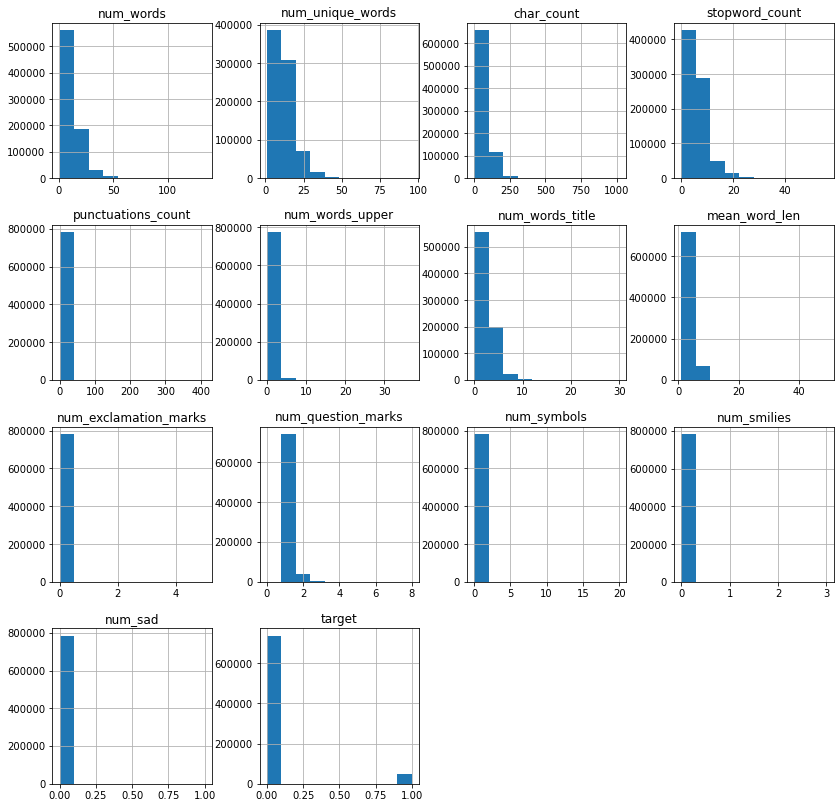

In [46]:
# Plotting the distribution of features in traing set as histogram

train_mf.hist(figsize=(14,14))
plt.show()

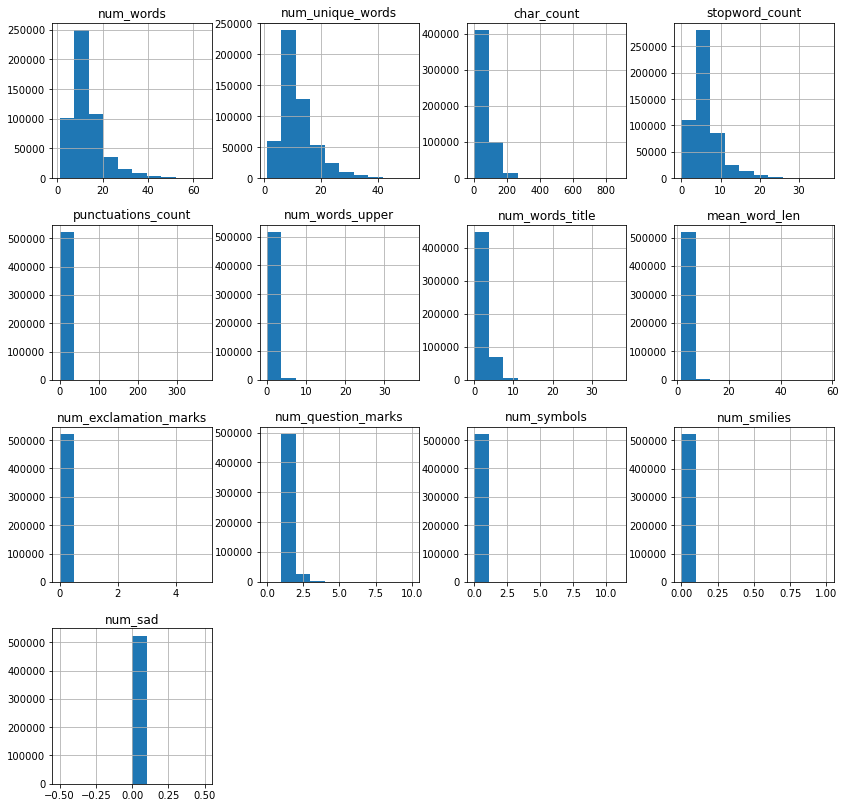

In [47]:
# Plotting the distribution of features in test set as histogram

test_mf.hist(figsize=(14,14))
plt.show()

In [48]:
# to check whether there are columns with no useful information

print(train_mf.columns)

Index(['num_words', 'num_unique_words', 'char_count', 'stopword_count',
       'punctuations_count', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'lower_question_text', 'num_exclamation_marks',
       'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad',
       'target'],
      dtype='object')


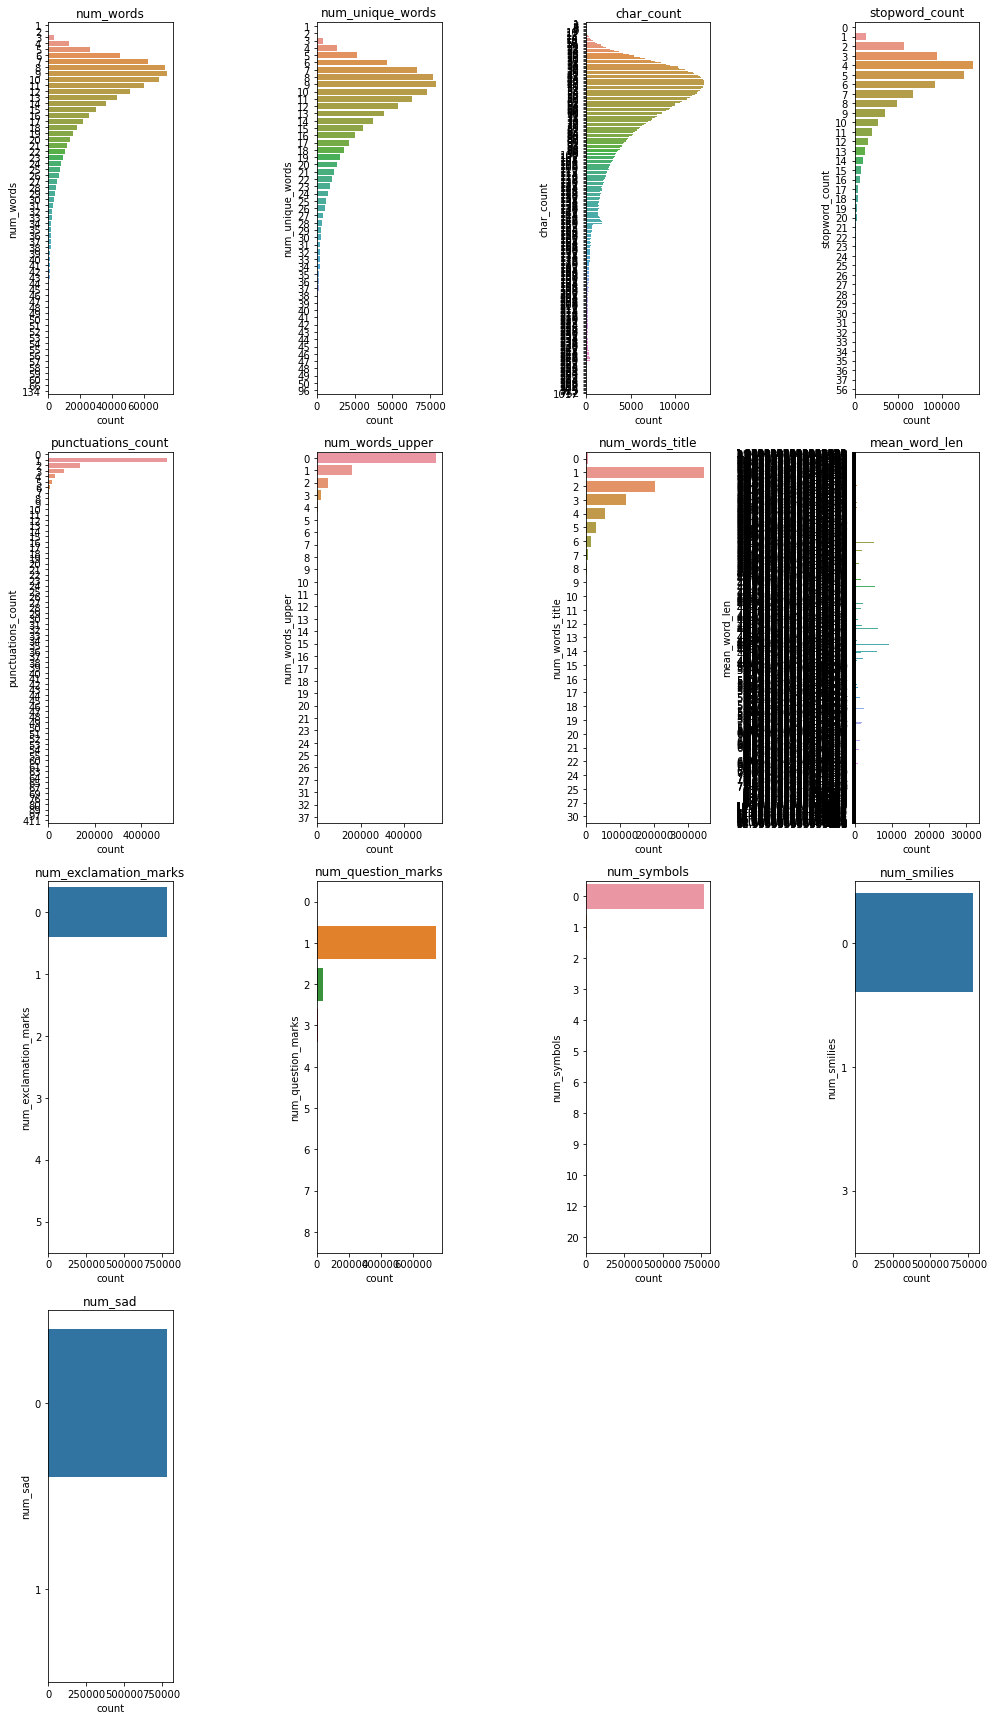

In [49]:
import seaborn as sns

features = ['num_words', 'num_unique_words', 'char_count', 'stopword_count',
       'punctuations_count', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad',]

fig = plt.figure(figsize=(14,24))
for i in range(len(features)): 
    fig.add_subplot(4, 4, i+1) 
    ax = sns.countplot(y=features[i], data=train_mf)
    plt.title(features[i])
plt.tight_layout() 
plt.show()

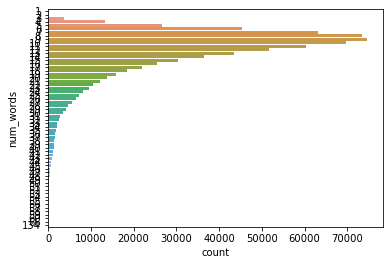

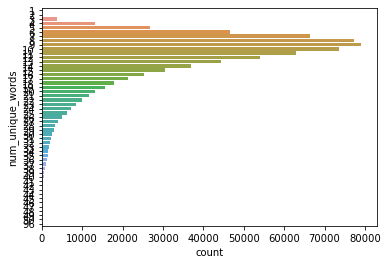

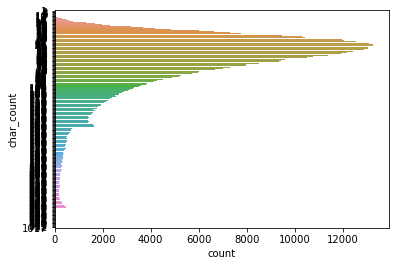

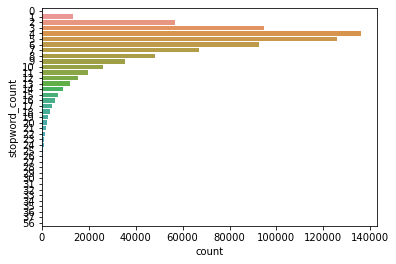

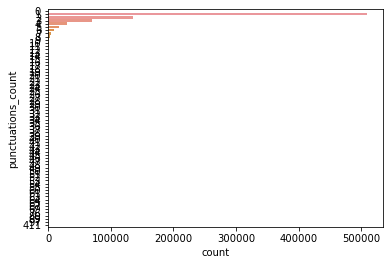

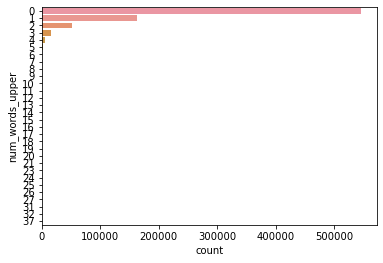

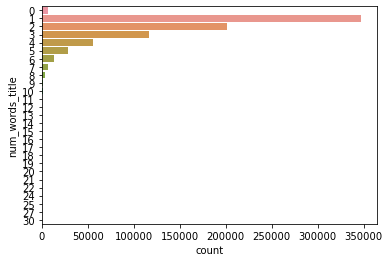

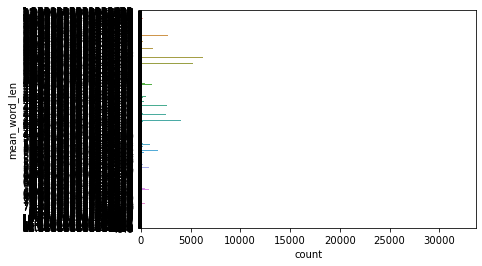

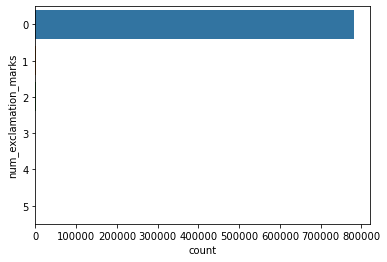

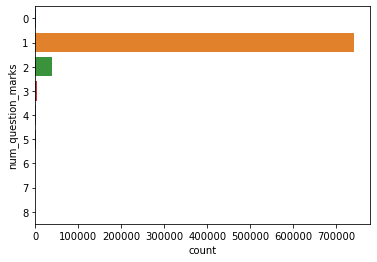

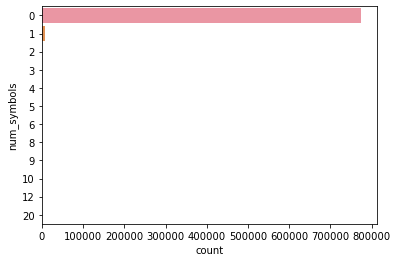

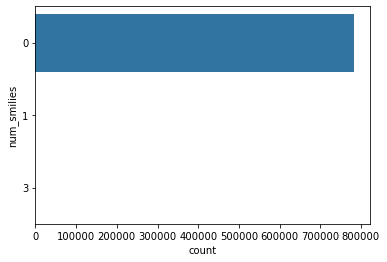

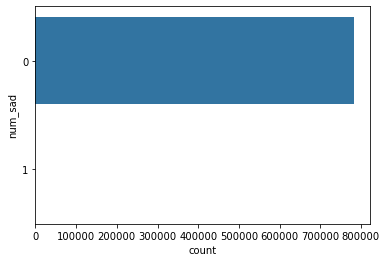

In [50]:
import seaborn as sns

features = ['num_words', 'num_unique_words', 'char_count', 'stopword_count',
       'punctuations_count', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad',]

for feature in features:
    sns.countplot(y=feature, data=train_mf)
    plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

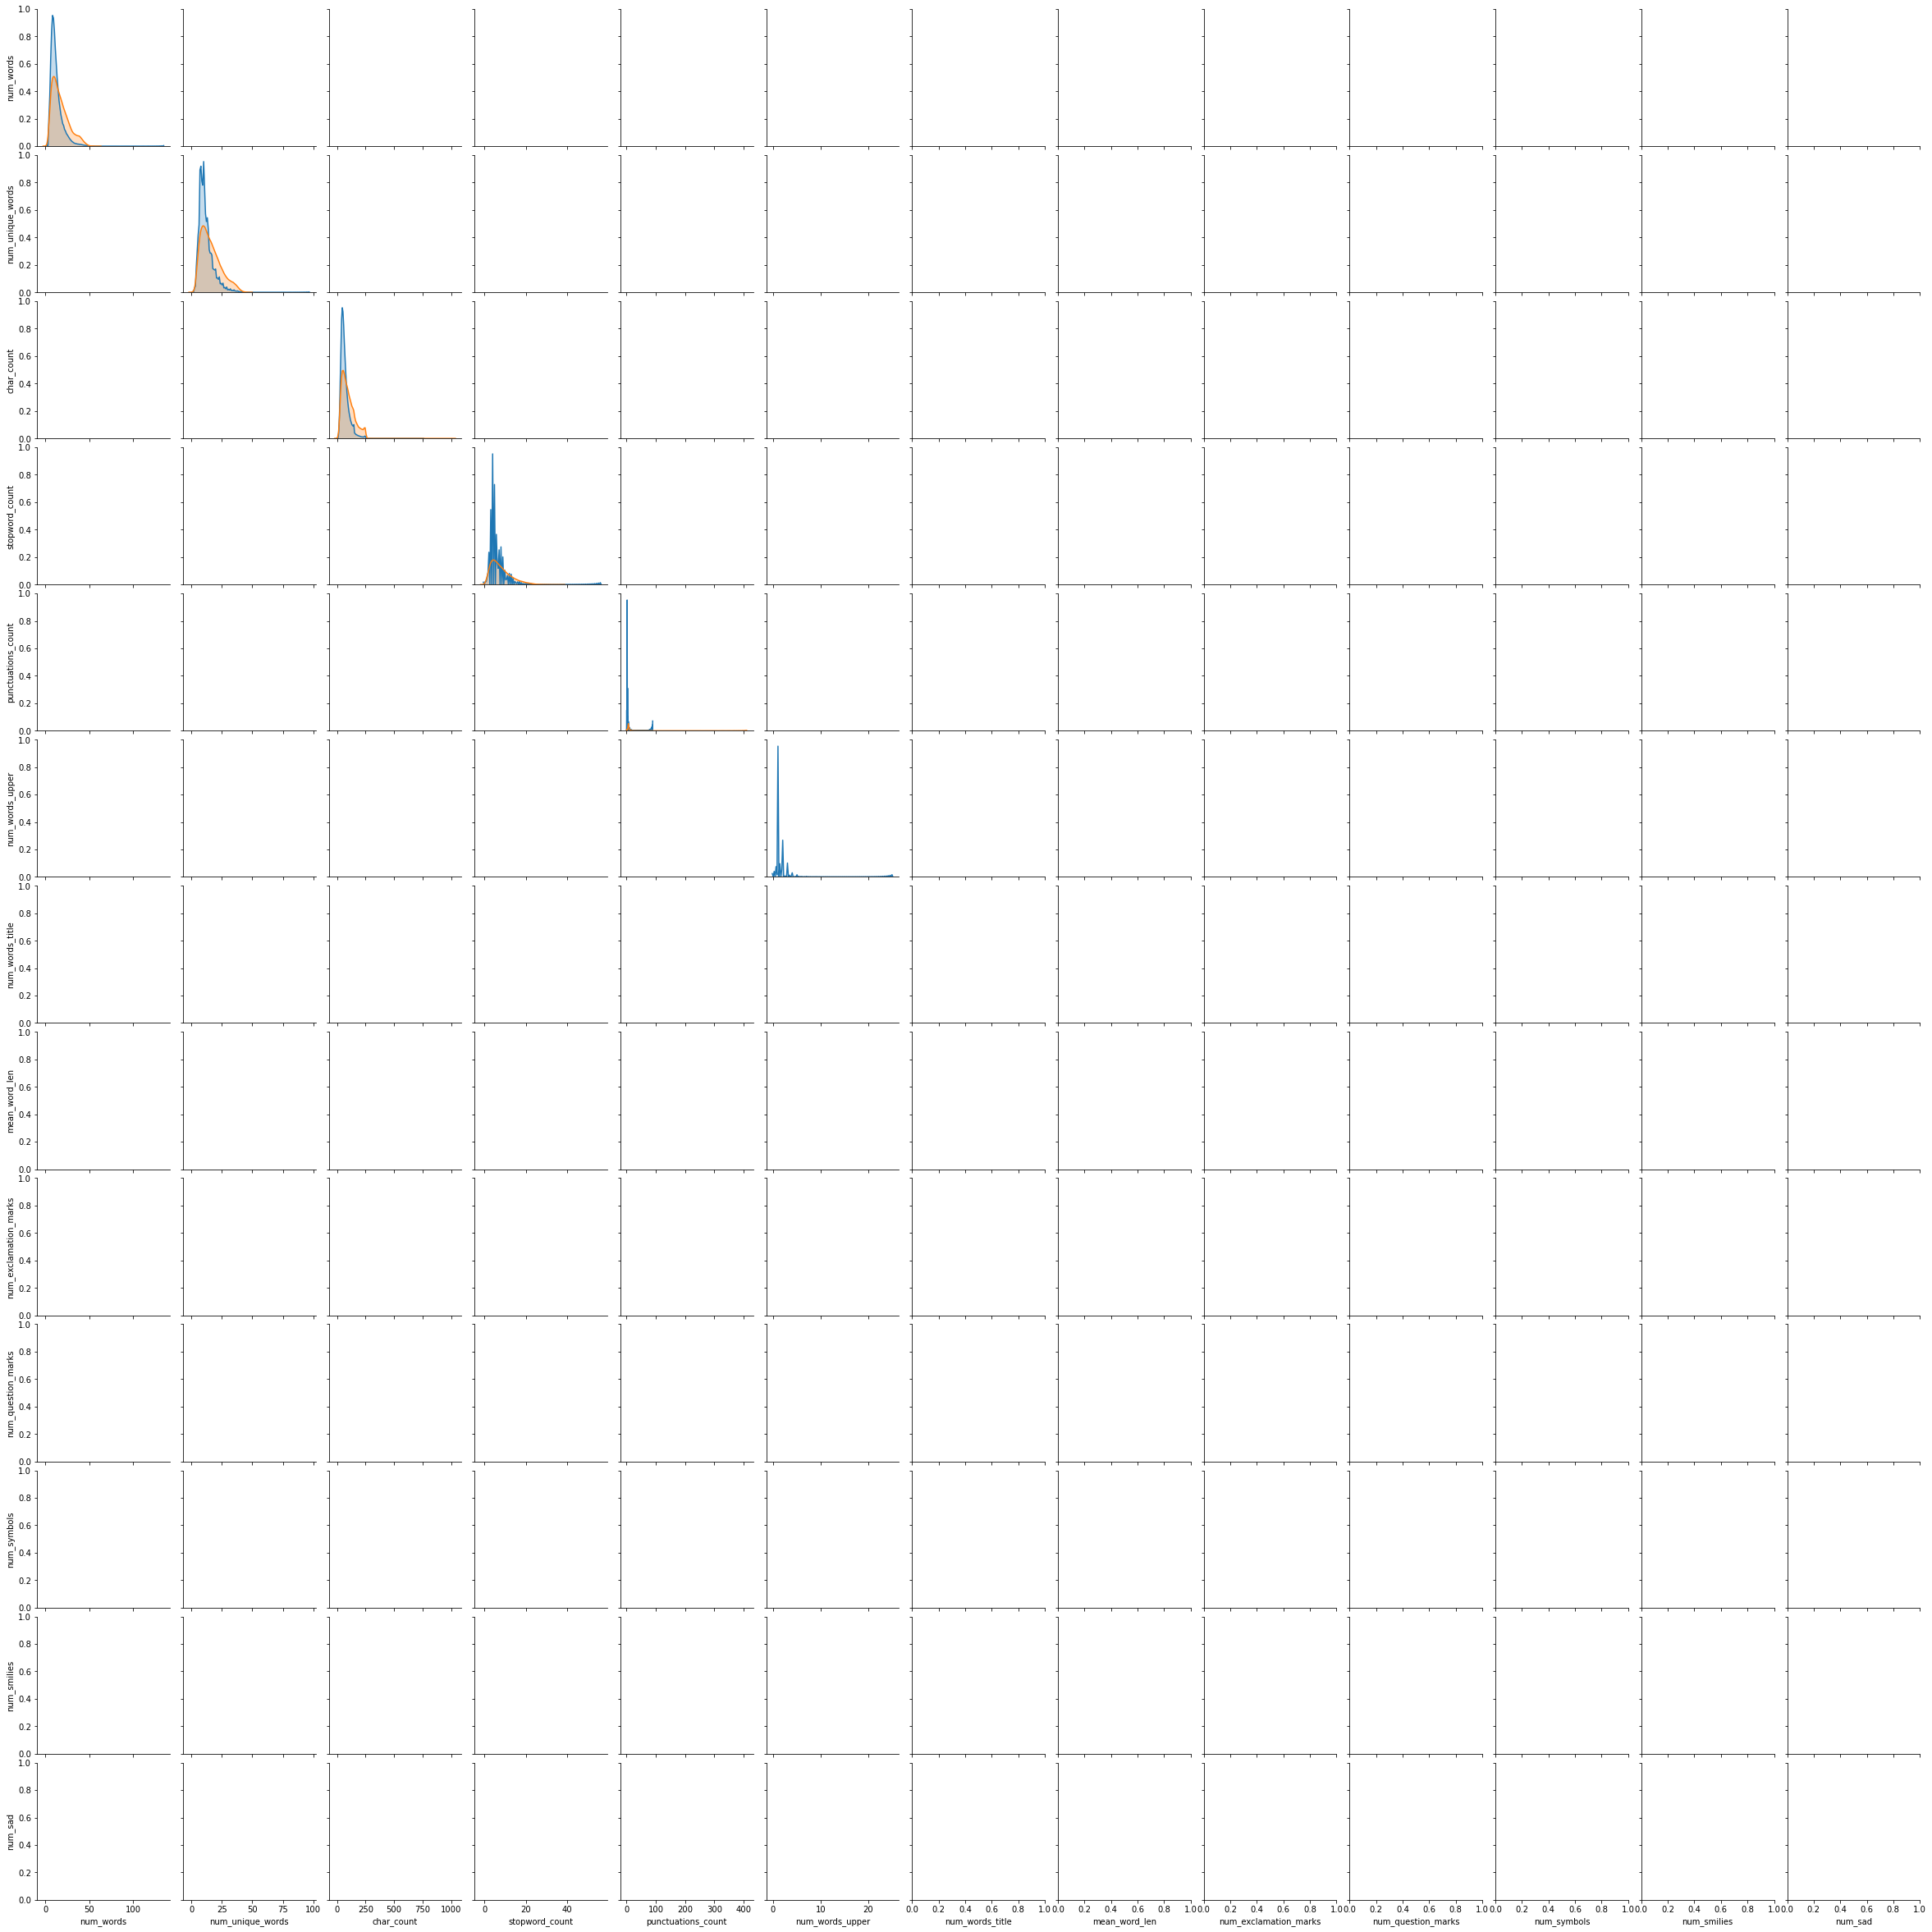

In [51]:
%%time
## visualizing the plots of all distribution
sns.pairplot(data=train_mf,hue="target")

In [52]:
import seaborn as sns

features = ['num_words', 'num_unique_words', 'char_count', 'stopword_count',
       'punctuations_count', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad',]

fig = plt.figure(figsize=(14,24))
for i in range(len(features)): 
    fig.add_subplot(4, 4, i+1) 
    ax = sns.countplot(y=features[i], data=test_mf, palette = )
    plt.title(features[i])
plt.tight_layout() 
plt.show()

SyntaxError: invalid syntax (<ipython-input-52-65e6f7ba35d3>, line 10)

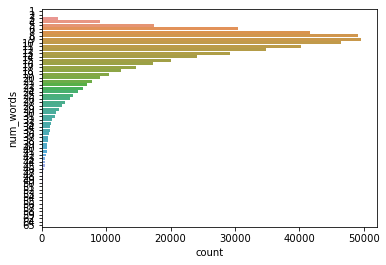

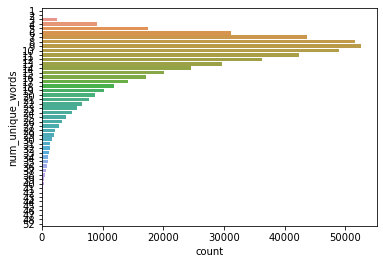

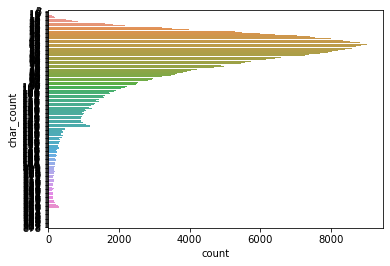

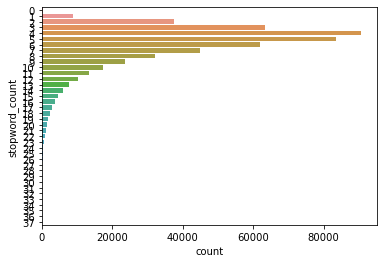

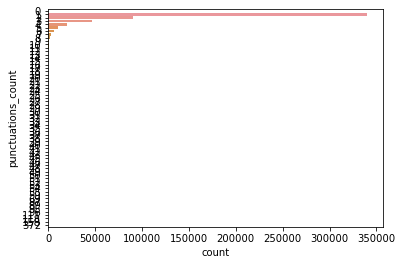

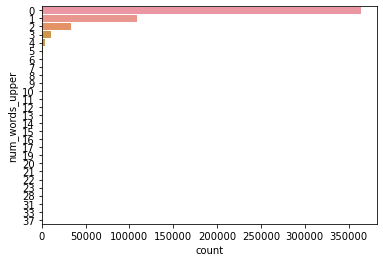

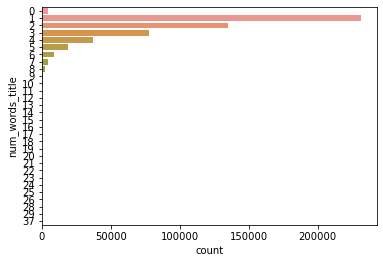

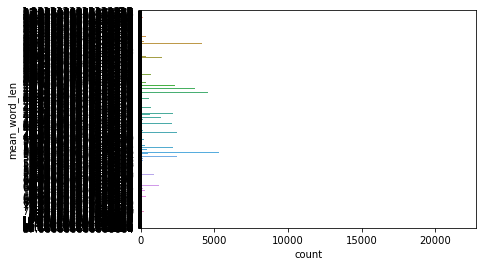

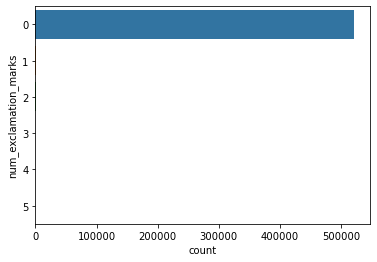

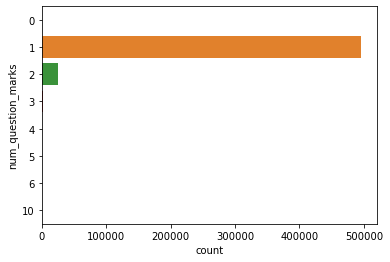

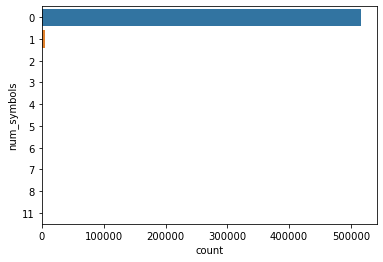

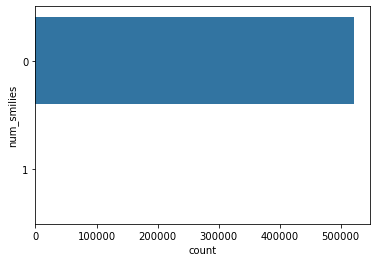

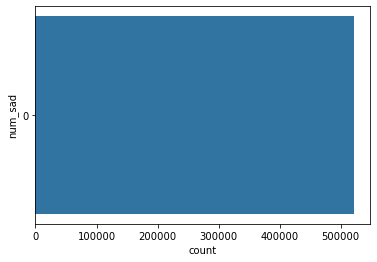

In [53]:
import seaborn as sns

features = ['num_words', 'num_unique_words', 'char_count', 'stopword_count',
       'punctuations_count', 'num_words_upper', 'num_words_title',
       'mean_word_len', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad',]

for feature in features:
    sns.countplot(y=feature, data=test_mf)
    plt.show()

It is observed that there are no 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad', hence these features will be dropped from the working dataset

In [54]:
ls /kaggle/input/qiqc-metafeatures/

Outliers_submission-mf.csv  __notebook__.ipynb  __results___files/
Test_metafeatures.csv       __output__.json     custom.css
Train_metafeatures.csv      __results__.html


In [55]:
train_mf = pd.read_csv("/kaggle/input/qiqc-metafeatures/Train_metafeatures.csv")
test_mf = pd.read_csv("/kaggle/input/qiqc-metafeatures/Test_metafeatures.csv")

In [56]:
train_wmf = train_mf.drop(['lower_question_text', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad', 'target'], axis = 1)

In [57]:
train_wmf.head(5)

,Unnamed: 0,num_words,num_unique_words,char_count,stopword_count,punctuations_count,num_words_upper,num_words_title,mean_word_len
0,0,24,22,137,13,8,2,6,4.750000
1,1,9,9,54,5,1,0,3,5.111111
2,2,8,8,52,5,1,0,2,5.625000
3,3,9,9,47,4,1,0,3,4.333333
4,4,17,16,88,7,1,0,2,4.235294


In [58]:
test_wmf = test_mf.drop(['lower_question_text', 'num_exclamation_marks', 'num_question_marks', 'num_symbols', 'num_smilies', 'num_sad'], axis = 1)

In [59]:
X = train_wmf

In [60]:
y = train_mf['target']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(548571, 9)
(235102, 9)
(548571,)
(235102,)


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [64]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [65]:
# define model
model_mf_lr = LogisticRegression(solver='saga', class_weight = 'balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_mf_lr, X_train_std, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.721


In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

model_mf_lr.fit(X_train,y_train)
predictions = model_mf_lr.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(f'F-measure: %.3f' % f1_score(y_test,predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    220588
           1       0.06      1.00      0.12     14514

    accuracy                           0.06    235102
   macro avg       0.03      0.50      0.06    235102
weighted avg       0.00      0.06      0.01    235102

[[     0 220588]
 [     0  14514]]
F-measure: 0.116


In [67]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%


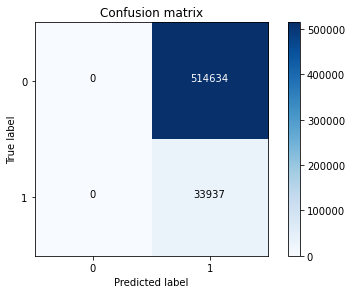

In [68]:
y_train_pre = model_mf_lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [69]:
print("F1 Score is: ", f1_score(y_train, y_train_pre))

F1 Score is:  0.11652028813338186


In [70]:
X_val = test_wmf

In [71]:
# Step 4: Evaluate the model

y_predict = model_mf_lr.predict(X_val)


In [72]:
print(classification_report(y_train, y_train_pre))
print(confusion_matrix(y_train, y_train_pre))
print(f'F-measure: %.3f' % f1_score(y_train, y_train_pre))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    514634
           1       0.06      1.00      0.12     33937

    accuracy                           0.06    548571
   macro avg       0.03      0.50      0.06    548571
weighted avg       0.00      0.06      0.01    548571

[[     0 514634]
 [     0  33937]]
F-measure: 0.117


In [73]:
sub_mf_bal = pd.read_csv("/kaggle/input/quora/test.csv")

In [74]:
out_mf_bal = pd.DataFrame({"qid":submission_mf["qid"].values})

NameError: name 'submission_mf' is not defined

In [75]:
out_mf_bal['target'] = y_predict

NameError: name 'out_mf_bal' is not defined

In [76]:
out_mf_bal

NameError: name 'out_mf_bal' is not defined

In [77]:
out_mf_bal.to_csv("Outliers_submission-mf_bal.csv", index=False)

NameError: name 'out_mf_bal' is not defined

# SMOTE

In [78]:
# transform the dataset

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [79]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 48451
Before OverSampling, counts of label '0': 735222 

After OverSampling, the shape of train_X: (548571, 9)
After OverSampling, the shape of train_y: (548571,) 

After OverSampling, counts of label '1': 33937
After OverSampling, counts of label '0': 514634


In [80]:
X_val = test_wmf

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

In [82]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1029310, 9)
Number transactions y_train dataset:  (1029310,)
Number transactions X_test dataset:  (441134, 9)
Number transactions y_test dataset:  (441134,)


In [83]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 48451
Before OverSampling, counts of label '0': 735222 

After OverSampling, the shape of train_X: (1470444, 9)
After OverSampling, the shape of train_y: (1470444,) 

After OverSampling, counts of label '1': 735222
After OverSampling, counts of label '0': 735222


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, \
roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   15.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [85]:
clf.best_params_

{'C': 1.0}

In [86]:
model_smote_lr = LogisticRegression(C=1,penalty='l2', solver = 'liblinear', verbose=5)
model_smote_lr.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1, solver='liblinear', verbose=5)

In [87]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 64.13680205463605%


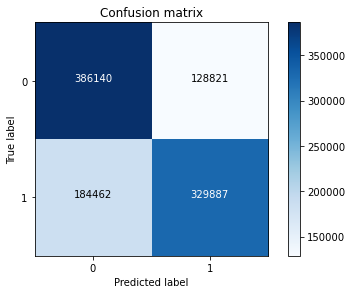

In [88]:
y_train_pre = model_smote_lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 63.95304088774997%


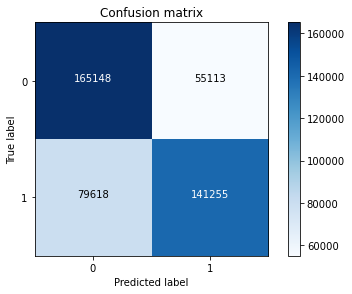

In [89]:
y_pre = model_smote_lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

f1_score(y_test, y_pre)
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [90]:
f1_score(y_test, y_pre)

0.6770906981816265

In [91]:
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))
print(f'F-measure: %.3f' % f1_score(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71    220261
           1       0.72      0.64      0.68    220873

    accuracy                           0.69    441134
   macro avg       0.70      0.69      0.69    441134
weighted avg       0.70      0.69      0.69    441134

[[165148  55113]
 [ 79618 141255]]
F-measure: 0.677


In [92]:
print(classification_report(y_train, y_train_pre))
print(confusion_matrix(y_train, y_train_pre))
print(f'F-measure: %.3f' % f1_score(y_train, y_train_pre))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71    514961
           1       0.72      0.64      0.68    514349

    accuracy                           0.70   1029310
   macro avg       0.70      0.70      0.69   1029310
weighted avg       0.70      0.70      0.69   1029310

[[386140 128821]
 [184462 329887]]
F-measure: 0.678


In [93]:
# Step 4: Evaluate the model

y_predict = model_smote_lr.predict(X_val)


In [94]:
y_pred = pd.DataFrame(y_predict)

In [95]:
y_pred.head(5)

,0
0,1
1,0
2,0
3,0
4,0


In [96]:
submission_mf = pd.read_csv("/kaggle/input/quora/test.csv")

In [97]:
submission_mf.head(5)

,qid,question_text
0,f56a9a31974dc66186e8,Is it a good idea to go through a phlebotomy c...
1,d957c3758060f45da303,How can I fix a lead into a camlin compass to ...
2,ad822d5abaedb9e247b9,How many animes are there in world?
3,4e979c23eeb6a4bd1f2e,How do I tell my family I cut?
4,333cc031262566b8da49,How do I save down my bitcoin image address fr...


In [98]:
out_df = pd.DataFrame({"qid":submission_mf["qid"].values})

In [99]:
out_df['target'] = y_pred

In [100]:
out_df.to_csv("Outliers_submission-mf.csv", index=False)

In [101]:
out_df.head(5)

,qid,target
0,f56a9a31974dc66186e8,1
1,d957c3758060f45da303,0
2,ad822d5abaedb9e247b9,0
3,4e979c23eeb6a4bd1f2e,0
4,333cc031262566b8da49,0


In [102]:
test_lemm = pd.read_csv("/kaggle/input/processed-sets/QIQC_TextProcessed_TestSet.csv")

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [104]:
model.classes_

NameError: name 'model' is not defined

# Word Embedding - Tf-Idf

In [105]:
# Get the tfidf vectors #
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3), min_df=3, max_df=0.9, strip_accents='unicode', use_idf=True, smooth_idf=True, sublinear_tf=True)           
  

In [106]:
train_tfidf = tfidf_vec.fit_transform(train_lemm['lemm_str'].values.astype('U').tolist()) 

NameError: name 'train_lemm' is not defined

In [107]:
train_tfidf.shape

NameError: name 'train_tfidf' is not defined

In [108]:
test_tfidf = tfidf_vec.transform(test_lemm['lemm_str'].values.astype('U').tolist()) 

NotFittedError: The TF-IDF vectorizer is not fitted

In [109]:
test_tfidf.shape

NameError: name 'test_tfidf' is not defined

# Without hyperparameters tuning

In [110]:
X_train = train_tfidf
y_train = train_wmf["target"].values

NameError: name 'train_tfidf' is not defined

In [111]:
from sklearn.model_selection import train_test_split

# split the train data now into train validation and cross validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3)